In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [123]:
r=pd.read_csv('titanic.csv')
r.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [124]:
r.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [125]:
r.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [126]:
#DROP CABIN COLUMN BECAUSE IT HAVE LOTS OF NAN VALUES.
r.drop('Cabin',inplace=True,axis=1)

In [127]:
r.isnull().sum()
#AGE COLUMN ALSO HAVE NULL VALUES
b=r['Age'].mean()
r['Age'].replace(np.NaN,b,inplace=True)  #REPLACE ALL THE NULL VALUES OF AGE WITH MEAN OF THEIR AGE

In [128]:
#NOW ONLY FEW NAN VALUE LEFT, NOW WE CAN REMOVE IT
r.dropna(axis=0,inplace=True)
r.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [129]:
r.shape

(889, 11)

In [130]:
#WE DONT NEED COLUMNS LIKE PassengerId, Name, Ticket , Embarked, BECAUSE IT DOESNOT HAVE ANY RELATION WHO IS SURVIVED OR NOT.
r.drop(['PassengerId','Name','Ticket','Embarked'],axis=1,inplace=True)


In [131]:
r.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


HIGH STANDARD DEVIATION PRESENT IN 'Age' AND 'Fare' COLUMNS, MEANS DATA IS SPREADED TOO MUCH.

THERE IS LARGE DIFFERENCE BETWEEN 75 PERCENTILE AND MAX IN 'Age' AND 'Fare' COLUMNS, MEANS OUTLIERS ARE PRESENT.


VISUALIZATION

UNIVARIENT ANALYSIS

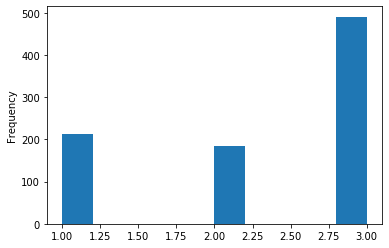

In [132]:
r['Pclass'].plot.hist()

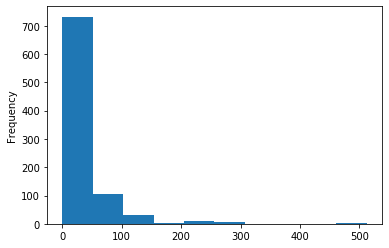

In [133]:
r['Fare'].plot.hist()

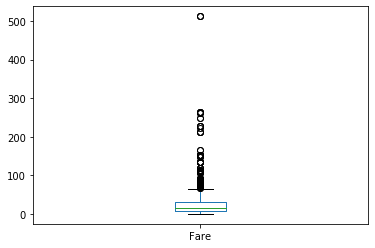

In [134]:
r['Fare'].plot.box()
#OUTLIERS ARE PRESENT

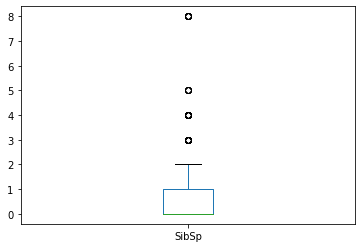

In [135]:
r['SibSp'].plot.box()
#OUTLIERS ARE PRESENT.

Survived       AxesSubplot(0.125,0.536818;0.227941x0.343182)
Pclass      AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Age         AxesSubplot(0.672059,0.536818;0.227941x0.343182)
SibSp             AxesSubplot(0.125,0.125;0.227941x0.343182)
Parch          AxesSubplot(0.398529,0.125;0.227941x0.343182)
Fare           AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

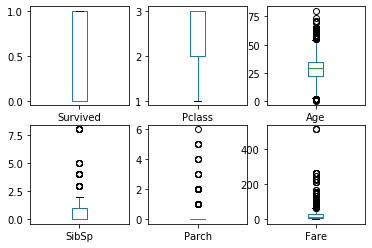

In [136]:
r.plot(kind='box',subplots=True,layout=(2,3))
#SHOWS ALL THE COLUMNS WITH BOX PLOT

{'bodies': [<matplotlib.collections.PolyCollection at 0x11476a6b9c8>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x11476a8e588>,
 'cmins': <matplotlib.collections.LineCollection at 0x11476ddcf88>,
 'cbars': <matplotlib.collections.LineCollection at 0x114769c0c88>}

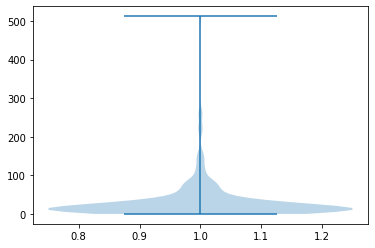

In [137]:
plt.violinplot(r['Fare'])
#MOST VALUES LIE BETWEEN 0 TO 100 IN FARE COLUMN

{'bodies': [<matplotlib.collections.PolyCollection at 0x1147722fd88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x11478c53308>,
 'cmins': <matplotlib.collections.LineCollection at 0x11478925fc8>,
 'cbars': <matplotlib.collections.LineCollection at 0x114785b1a48>}

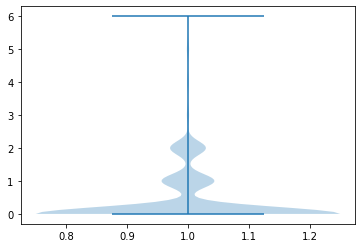

In [138]:
plt.violinplot(r['Parch'])

VISUALIZATION

BIVARIENT ANALYSIS

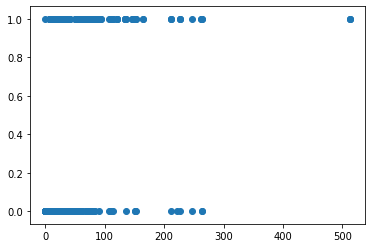

In [139]:
plt.scatter(r['Fare'],r['Survived'])

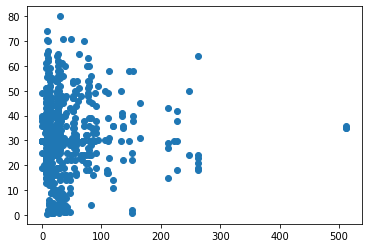

In [140]:
plt.scatter(r['Fare'],r['Age'])

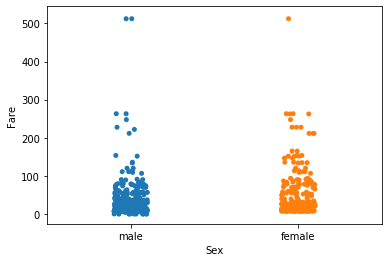

In [141]:
sns.stripplot(x='Sex',y='Fare',data=r)

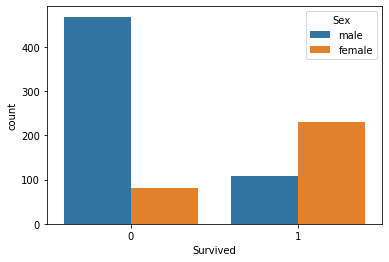

In [142]:
sns.countplot(x='Survived',hue='Sex',data=r)
#MALES DIE MORE THAN WOMAN
#FEMALES SURVIVAL PERCENTAGE IS HIGH

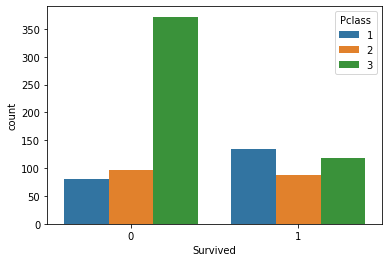

In [143]:
sns.countplot(x='Survived',hue='Pclass',data=r)
#MEANS CLASS 1 PEOPLE SURVIVED THE MOST AND CLASS 3 PEOPLE NOT SURVIVED MORE.

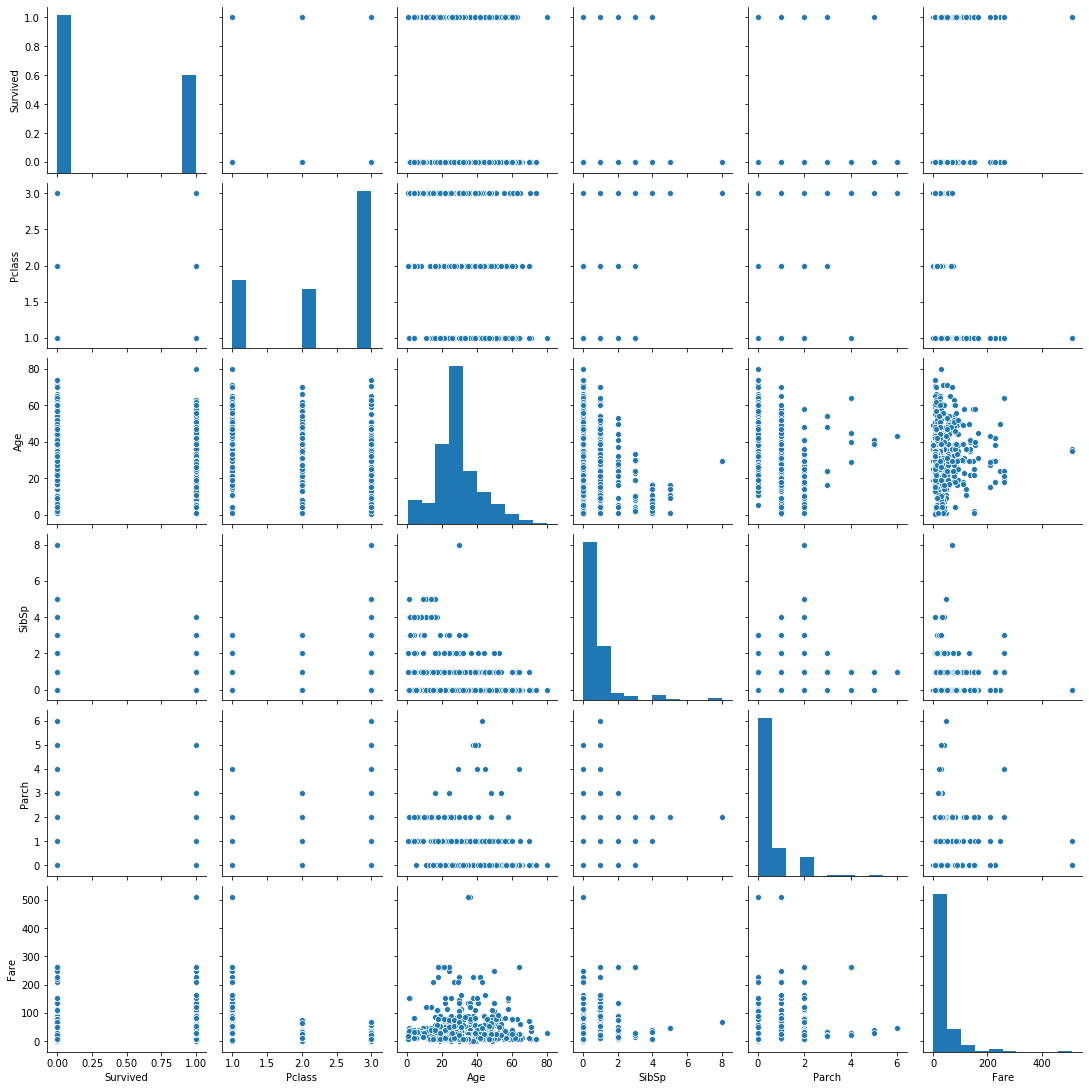

In [144]:
sns.pairplot(r)

In [145]:
#WE CHANGE SEX OF MALE AS 0 AND FEMALE AS 1, BECAUSE MODEL ONLY UNDERSTAND NUMERIC VALUES.
r['Sex'].replace('male',0,inplace=True)

In [146]:
r['Sex'].replace('female',1,inplace=True)

In [147]:
r

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.000000,1,0,7.2500
1,1,1,1,38.000000,1,0,71.2833
2,1,3,1,26.000000,0,0,7.9250
3,1,1,1,35.000000,1,0,53.1000
4,0,3,0,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000
887,1,1,1,19.000000,0,0,30.0000
888,0,3,1,29.699118,1,2,23.4500
889,1,1,0,26.000000,0,0,30.0000


In [148]:
r.skew()


Survived    0.484568
Pclass     -0.636998
Sex         0.625625
Age         0.431720
SibSp       3.691058
Parch       2.745160
Fare        4.801440
dtype: float64

REMOVE SKEWNESS

In [149]:
for col in r.columns:
    if r.skew().loc[col]>0.55:
        r[col]=np.log1p(r[col])
r.skew()

Survived    0.484568
Pclass     -0.636998
Sex         0.625625
Age         0.431720
SibSp       1.657860
Parch       1.671905
Fare        0.400109
dtype: float64

FINDING CORRELATION

<function matplotlib.pyplot.show(*args, **kw)>

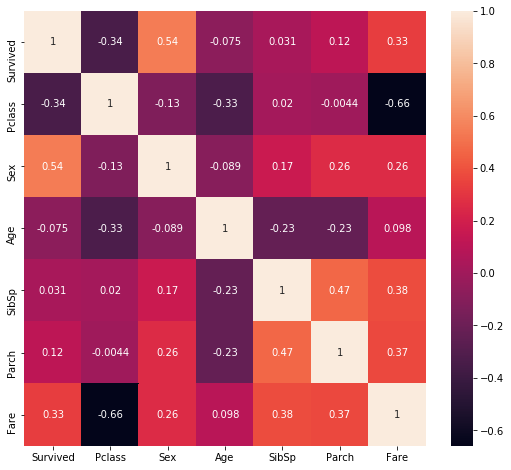

In [150]:
cor=r.corr()
plt.figure(figsize=(9,8))
sns.heatmap(cor,annot=True)
plt.show

NOW REMOVING OUTLIERS

In [151]:
zsc=abs(zscore(r))
zsc
#ALL THE ZSCORE VALUES.

array([[0.78696114, 0.82520863, 0.73534203, ..., 0.88716686, 0.52982206,
        0.87759093],
       [1.27071078, 1.57221121, 1.35991138, ..., 0.88716686, 0.52982206,
        1.36637963],
       [1.27071078, 0.82520863, 1.35991138, ..., 0.61021929, 0.52982206,
        0.79628127],
       ...,
       [0.78696114, 0.82520863, 1.35991138, ..., 0.88716686, 2.13812299,
        0.24566301],
       [1.27071078, 1.57221121, 0.73534203, ..., 0.61021929, 0.52982206,
        0.49106801],
       [0.78696114, 0.82520863, 0.73534203, ..., 0.61021929, 0.52982206,
        0.81675534]])

In [152]:
threshold=3
print(np.where(zsc>3))
# HERE FIRST ARRAY IS SHOWING ROW NO. AND SECOND ARRAY IS SHOWING COLUMN NO. WHERE OUTLIER PRESENT

(array([ 13,  25,  59,  70,  95, 115, 158, 166, 178, 179, 200, 257, 262,
       270, 276, 301, 323, 359, 385, 412, 437, 465, 479, 480, 492, 566,
       596, 609, 629, 632, 637, 671, 673, 677, 678, 682, 731, 736, 744,
       791, 805, 814, 821, 844, 849, 861, 883], dtype=int64), array([5, 5, 4, 4, 3, 3, 4, 5, 6, 4, 4, 6, 6, 6, 6, 6, 4, 5, 4, 6, 5, 6,
       4, 6, 3, 5, 6, 5, 3, 6, 5, 3, 6, 5, 6, 4, 6, 6, 3, 4, 6, 6, 6, 4,
       3, 4, 5], dtype=int64))


In [153]:
zsc[13][5]
#zscore value is greater than 3 means outlier.

3.821408898565928

In [154]:
zsc[59][4]

3.2604677629705816

In [155]:
new_r=r[(zsc<3).all(axis=1)]
new_r

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0.000000,22.000000,0.693147,0.000000,2.110213
1,1,1,0.693147,38.000000,0.693147,0.000000,4.280593
2,1,3,0.693147,26.000000,0.000000,0.000000,2.188856
3,1,1,0.693147,35.000000,0.693147,0.000000,3.990834
4,0,3,0.000000,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...,...
886,0,2,0.000000,27.000000,0.000000,0.000000,2.639057
887,1,1,0.693147,19.000000,0.000000,0.000000,3.433987
888,0,3,0.693147,29.699118,0.693147,1.098612,3.196630
889,1,1,0.000000,26.000000,0.000000,0.000000,3.433987


In [156]:
print(r.shape) #BEFORE OUTLIERS REMOVAL

new_r.shape     #AFTER OUTLIERS REMOVAL

(889, 7)


(842, 7)

NOW SEE DISTRIBUTION OF SKEWNESS AFTER OUTLIER REMOVAL

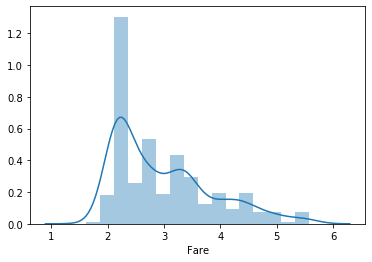

In [157]:
sns.distplot(new_r['Fare'])

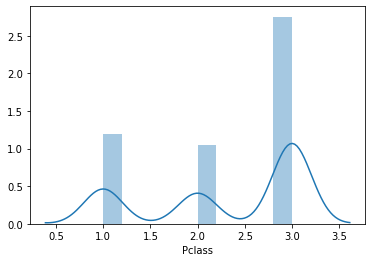

In [158]:
sns.distplot(new_r['Pclass'])

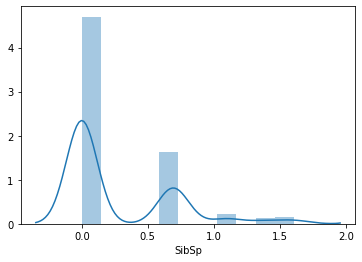

In [159]:
sns.distplot(new_r['SibSp'])

APPLY LOGISTIC RIGRESSION

In [160]:
x=new_r.iloc[:,1:]
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0.000000,22.000000,0.693147,0.000000,2.110213
1,1,0.693147,38.000000,0.693147,0.000000,4.280593
2,3,0.693147,26.000000,0.000000,0.000000,2.188856
3,1,0.693147,35.000000,0.693147,0.000000,3.990834
4,3,0.000000,35.000000,0.000000,0.000000,2.202765
...,...,...,...,...,...,...
886,2,0.000000,27.000000,0.000000,0.000000,2.639057
887,1,0.693147,19.000000,0.000000,0.000000,3.433987
888,3,0.693147,29.699118,0.693147,1.098612,3.196630
889,1,0.000000,26.000000,0.000000,0.000000,3.433987


In [161]:
y=new_r.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 842, dtype: int64

In [162]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=54)

In [163]:
train_x.shape

(589, 6)

In [164]:
test_x.shape

(253, 6)

In [165]:
train_y.shape

(589,)

In [166]:
test_y.shape

(253,)

In [167]:
lg=LogisticRegression()

In [168]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
pred=lg.predict(test_x)
print(pred)
#0 MEANS NOT SURVIVED 1 MEANS SURVIVED.

[0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0]


In [170]:
print('ACCURACY SCORE : ',accuracy_score(test_y,pred))
#Means model is 84 percent accurate.

ACCURACY SCORE :  0.841897233201581


In [171]:
print(confusion_matrix(test_y,pred))

[[137  13]
 [ 27  76]]


In [172]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       150
           1       0.85      0.74      0.79       103

    accuracy                           0.84       253
   macro avg       0.84      0.83      0.83       253
weighted avg       0.84      0.84      0.84       253



In [173]:
print(pred) #PREDICTED ANSWER BY MODEL

[0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1
 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0]


In [174]:
print(test_y.head(15))  #ACTUAL ANSWERS

105    0
484    1
554    1
82     1
726    1
361    0
728    0
668    0
334    1
789    0
835    1
878    0
97     1
290    1
487    0
Name: Survived, dtype: int64
